# UFCFVQ-15-M Programming for Data Science (Autumn 2021)
# Programming Task 2

## Student Id: 21050352

### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame 

In [1]:
#This cell is for import.
import pandas as pd
import numpy as np 
import scipy.stats #this library has the statistics functions and operations

import seaborn as sns #I chose seaborn because for this task, it provides intuiive graphics and the commands are easy

In [3]:
# add code here
import pandas as pd
residents = pd.read_csv("task2a.csv")
crime =  pd.read_csv("task2b.csv")
crime_resi = pd.merge(residents,crime)
crime_resi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   region                                    51 non-null     int64  
 1   median_household_income                   51 non-null     int64  
 2   share_unemployed_seasonal                 51 non-null     float64
 3   share_population_in_metro_areas           51 non-null     float64
 4   share_population_with_high_school_degree  51 non-null     float64
 5   share_non_citizen                         48 non-null     float64
 6   share_white_poverty                       51 non-null     float64
 7   gini_index                                51 non-null     float64
 8   share_non_white                           51 non-null     float64
 9   share_voters_voted_to_the_right           51 non-null     float64
 10  avg_biascrimes_per_100k                 

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Clean the merged data

In [4]:
# add code here
#dropping the column "share_voters_voted_to_the_right"

crime_resi = crime_resi.drop("share_voters_voted_to_the_right", axis = 1)

#null values cause errors in calculation, hence removeing them
crime_resi = crime_resi.dropna(axis=0) 

#index need to be reset because after dropping rows, new dataframe will retain the old index.
#this old index won't be sequential
#drop=True argument makes sure that when a new column of index is created, old index is dropped 

crime_resi = crime_resi.reset_index(drop= True)

crime_resi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   region                                    47 non-null     int64  
 1   median_household_income                   47 non-null     int64  
 2   share_unemployed_seasonal                 47 non-null     float64
 3   share_population_in_metro_areas           47 non-null     float64
 4   share_population_with_high_school_degree  47 non-null     float64
 5   share_non_citizen                         47 non-null     float64
 6   share_white_poverty                       47 non-null     float64
 7   gini_index                                47 non-null     float64
 8   share_non_white                           47 non-null     float64
 9   avg_biascrimes_per_100k                   47 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 3.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the effects of household income on levels of bias crimes

0.296

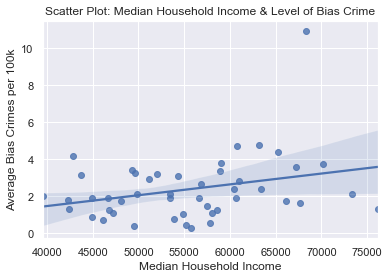

In [18]:
# add code here
import numpy as np
import scipy.stats

import seaborn as sns; sns.set_theme(color_codes=True) 

#scatterplots with a regression line are the best tool for visualisation of 
#the relationship between two variables.

plot_income = sns.regplot(x="median_household_income", y="avg_biascrimes_per_100k", data=crime_resi)
plot_income.set(title='Scatter Plot: Median Household Income & Level of Bias Crime')
plot_income.set_xlabel("Median Household Income")
plot_income.set_ylabel("Average Bias Crimes per 100k")

cor_house  = round(scipy.stats.pearsonr(crime_resi["median_household_income"], crime_resi["avg_biascrimes_per_100k"])[0],3)
cor_house

In the scatterplot above, the four pronounced observations are:

1. There is a outlier in the data which might affect the analysis.
2. The slope of the regression line is positive, hence there might exist a positive 
   correlation between median household income and level of bais crime.
   bias crimes are the crimes comitted due to certain bias againt the victim, it might be 
   racial bias, religious bias, so on.
3. The observation points aren't all within the confidence interval shade of the line.
   infact, more observations are outside the shade than inside. This means this linear model migh not best
   describe the behaviour of the population.
4. The correlation coeffiecent between average bias crimes and household income is 0.296 which is not a strong correlation. It is a weak positive correlation.
5. As household income level increases, bias crime also tend to increase.

Hence a hypothesis test is conducted to decide if there is a significant linear relationship between household incomes and bias crimes or the implied relation is just a lucky coindicence in the sample data.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Test the hypothesis that household income has no effect on levels of bias crime

Generally, household income level and crime rates are supposed to be related, poorer household area assumed to have higher crime rate. However, in the case of bias crimes, it seems to be different, higher median household income level seem to suggest higher rates of bias crimes.
However, this conclusion is only valid for this data. Does this behaviour follow in the population, or is it just a random coincidence?

To know this, we conduct a hypothesis test.

To test the hypotheisis that the household income has no effect on levels of bias crime, we use a correlation test.
Corretlation test between two variables (dependent = level of bias crime, exaplanatory = median household income) is performed by obtaining the pearson's correlation coefficeint, and checking if its absolute value is more than or equal to the critical values for a given confidence level and degree of freedom.

First we need to assume certain behaviour of population to carryout the testing:

1. Each observations in population are independent and identically distributed.
2. The population has a normal distribution, even if the sample doesnot show the behaviour.
3. Each observation in the sample has the same variance.


for this testing, the confidence level is 95%, degree of freedom is n-2= 45 and correlation coeffient is 0.296.
The null hypothesis is 
## H_0 = Household income has no significant effect on levels of bias crime 
and the alternative hypothesis is
## H_1 = Household income has significant effect on levels of bias crime

This means if the p-value (the probability of occurance of correlation in sample is random) is less than 0.05, the null hypothesis is rejected, else we conclude that the household income and levels of bias crime are probably indepedent. 

In [19]:
#add code here
import scipy.stats

r, p = scipy.stats.pearsonr(crime_resi["median_household_income"], crime_resi["avg_biascrimes_per_100k"])

print('r=%.3f, p=%.3f' % (r, p))

if p > 0.05:
    print('Null hypothesis accepted, the median household income and average bias crime levels are probably independent ')
else:
    print('Null hypothesis rejected, there is a significant correlation between median household income and average bias crime levels.\nThey are probably independent')

r=0.296, p=0.044
Null hypothesis rejected, there is a significant correlation between median household income and average bias crime levels.
They are probably independent


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of urbanisation on levels of bias crimes

0.209

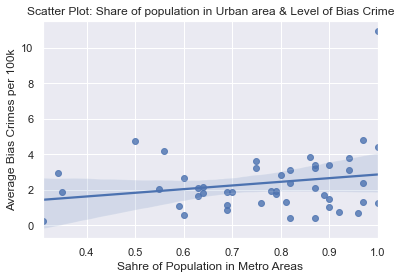

In [17]:
# add code here
#as in FR11, scatter plot with a regression line is a good representation 
#of the correlation of the variables (dependent=avg_biascrimes_per_100k, explanatory = share_population_in_metro_areas)

plot_metro = sns.regplot(x="share_population_in_metro_areas", y="avg_biascrimes_per_100k", data=crime_resi)

plot_metro.set(title='Scatter Plot: Share of population in Urban area & Level of Bias Crime')
plot_metro.set_xlabel("Sahre of Population in Metro Areas")
plot_metro.set_ylabel("Average Bias Crimes per 100k")

cor_metro  = round(scipy.stats.pearsonr(crime_resi["share_population_in_metro_areas"], crime_resi["avg_biascrimes_per_100k"])[0],3)
cor_metro

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

The observations from this graph are:
1. There seems to exists a linear relationship between living in metro area and average bias crimes.
2. There are no outliers.
3. Some data in this sample aren't within the confidence interval of this generated linear model.
4. More data are on the right side and scantly data in the left side. This data might be right skewed and not normally distributed.
5. The correlation coeffiecent between Average bias crime and metro areas is 0.209 which is a weak positive correlation.

### Requirement FR14 - Test the hypothesis that urbanisation has a significant effect on levels of bias crimes

The scatterplot suggests that higher level of urbanisation results in higher level of bias crimes, although not strongly correlated.

However, this conclusion is only valid for this randomised sample of data. Does this behaviour follow in the population, or is it just a random coincidence?

To know this, we conduct a hypothesis test.

To test the hypotheisis that the urbanisation has significant on levels of bias crime, we use a correlation test.
Corretlation test between two variables (dependent = level of bias crime, exaplanatory = share of population in metro areas) is performed by obtaining the pearson's correlation coefficeint, and checking if its absolute value is more than or equal to the critical values for a given confidence level and degree of freedom. (the scipy library function "pearsonr()" calculates the p-value automatically.

First we need to assume certain behaviour of population to carryout the testing:

1. Each observations in population are independent and identically distributed.
2. The population has a normal distribution, even if the sample doesnot show the behaviour.
3. Each observation in the sample has the same variance.


for this testing, the confidence level is 95%, degree of freedom is n-2= 45 and correlation coeffient is 0.209.
The null hypothesis is 
## H_0 = Urbanisation has no significant effect on levels of bias crime 
and the alternative hypothesis is
## H_1 = Urbanisation has significant effect on levels of bias crime

This means if the p-value (the probability of occurance of correlation in sample is random) is less than 0.05, the null hypothesis is rejected, else we conclude that the household income and levels of bias crime are probably indepedent. 

In [8]:
# add code here
import scipy.stats

r, p = scipy.stats.pearsonr(crime_resi["share_population_in_metro_areas"], crime_resi["avg_biascrimes_per_100k"])

print('r=%.3f, p=%.3f' % (r, p)) #rounding up the values to 3 decimal places

if p > 0.05:
    print('Null hypothesis accepted, the urbanisation and average bias crime levels are probably independent ')
else:
    print('Null hypothesis rejected, there is a significant correlation between urbanisation and average bias crime levels.\nThey are probably independent')

r=0.209, p=0.158
Null hypothesis accepted, the median household income and average bias crime levels are probably independent 


Here, unlike before, the null hypothesis is accepted. This means that in the population (the main data where this sample is taken from) Share of population in metro areas and average bias crime are probably independent. The correlation in the sample might be just random coincidence.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Task 2


This task was pretty easy for me as I had experience and confidence in pandas and statistics due to the assessments of Data Management Fundamentals and Statistical Inference. 
The instructions were very clear and the freedom to use libraries made the task doable.

Hypothesis testing used to be a complex concept to understand, but after some looking up online, I came to understand that we are testing the replicability of behaviour in sample in the original data.

Comparing between Matplotlib and seaborn, albeit little, made me choose seaborn, for two reasons:
1. Its commands are instictive and like ggplot2 in R
2. Its name sounds cooler.

Scatterplot with regression line is my favourite way to visualise any linear correlation.

After minutes of looking up online for proper library for correlation and hypothesis testing, the scipy.stats module was the obvious choice. The pearsonr() fucntion gives both the correlation coeffiecent and the p-value for it.

The methods I used, however aren't universal. One can write the fucntions for hypotheisis testing themselves and not use the libraries. MatPlotlib can be used for more flexibility in the plot, like adding custom titles, labels and etc.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>